In [18]:
# load the package
include("../FractionalFlow/FractionalFlow.jl")
using PyPlot, SetPyPlot, NLopt, Dierckx
import Calculus
import GR
FF = FractionalFlow

FractionalFlow

# Low sal test including pressure drop data

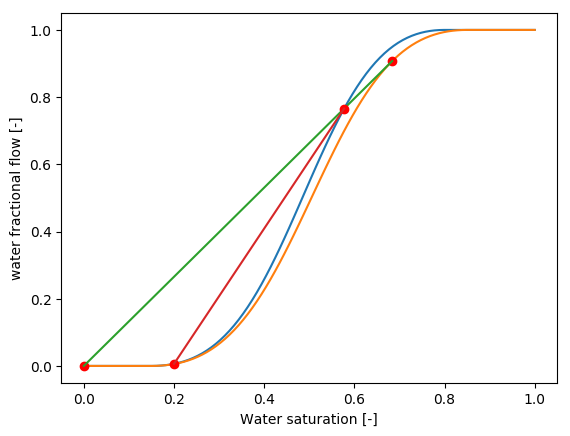

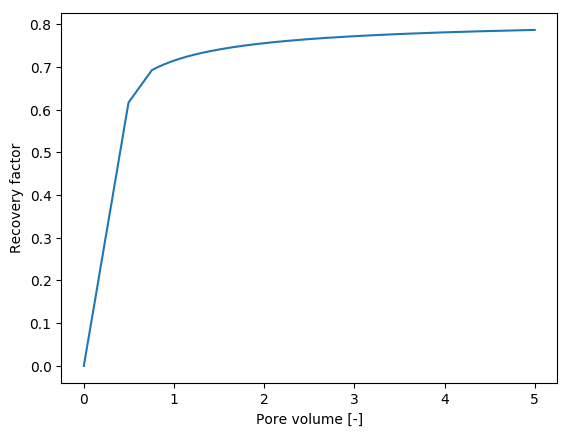

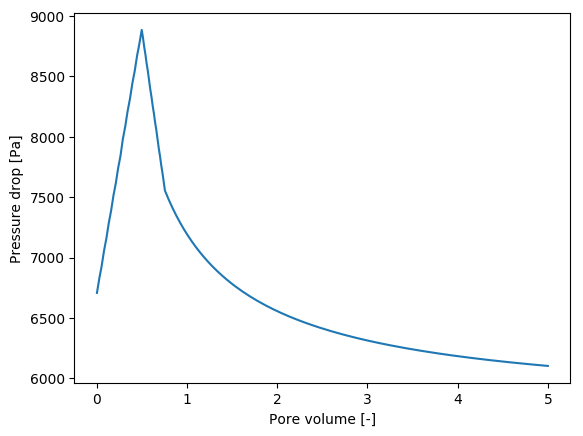

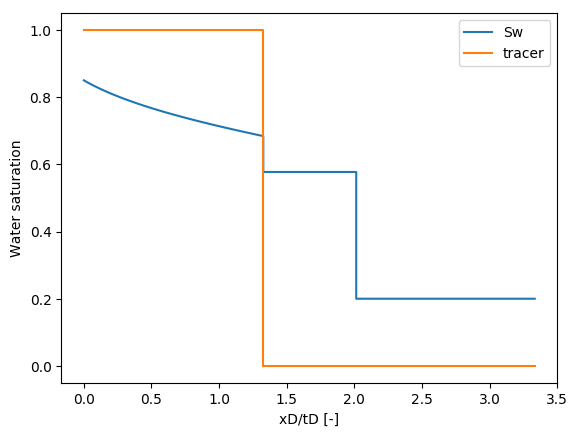

PyObject <matplotlib.legend.Legend object at 0x7fdfdbf76850>

In [19]:
fluids_hs = FF.oil_water_fluids(mu_water=1.5e-3, mu_oil=3e-3)
fluids_ls = FF.oil_water_fluids(mu_water=1e-3, mu_oil=3e-3)
rel_perms_hs = FF.oil_water_rel_perms(krw0=0.4, kro0=0.9, 
        swc=0.15, sor=0.2, nw=2.0, no = 2.0)
rel_perms_ls = FF.oil_water_rel_perms(krw0=0.3, kro0=0.95, 
        swc=0.15, sor=0.15, nw=2.0, no = 2.0)
core_flood = FF.core_flooding(u_inj=1.15e-5, pv_inject=5.0, p_back=1e5, sw_init=0.2, sw_inj=1.0, rel_perms=rel_perms_hs)
core_props = FF.core_properties()
ls_res = FF.low_sal_water_flood(core_props, fluids_ls, fluids_hs, rel_perms_hs, 
        rel_perms_ls, core_flood)
FF.visualize(ls_res)

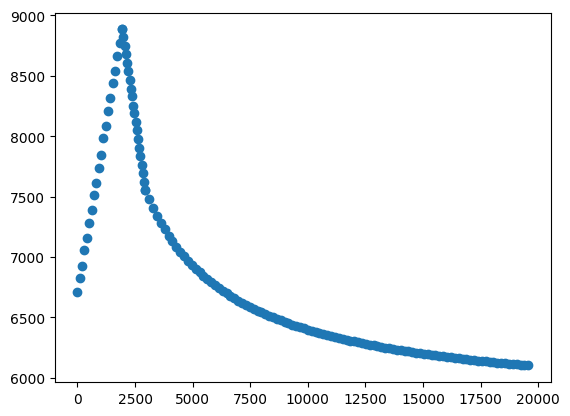

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdfe0ed6c90>

In [20]:
plot(ls_res.dp_time[:,1], ls_res.dp_time[:,2], "o")

# Tertiary flood

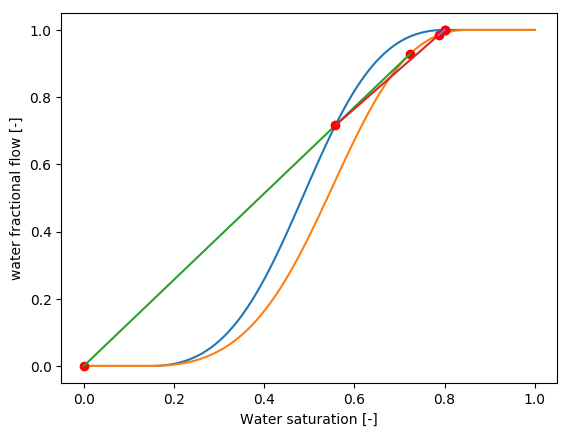

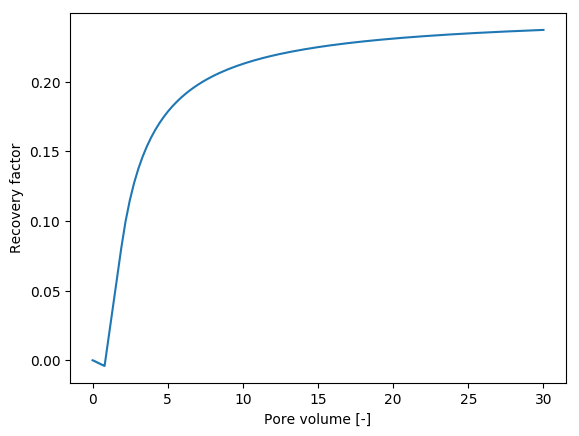

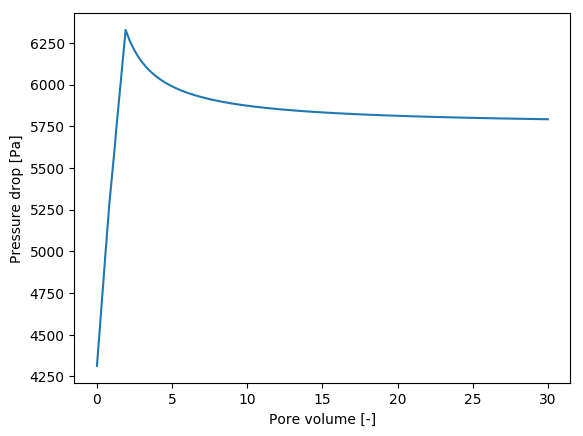

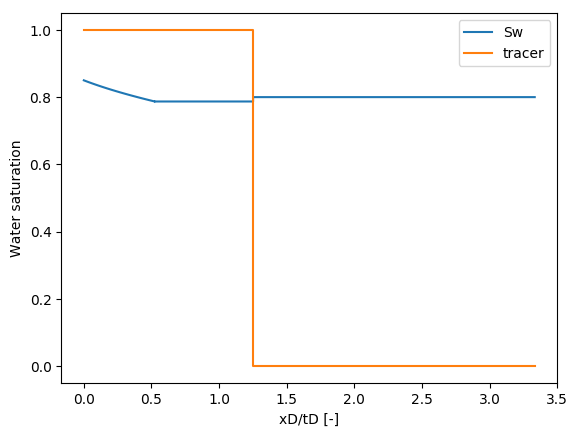

PyObject <matplotlib.legend.Legend object at 0x7fdfe1018850>

In [26]:
sor_hs = 0.20
sw_init = 1-sor_hs
fluids_hs = FF.oil_water_fluids(mu_water=1e-3, mu_oil=2e-3)
fluids_ls = FF.oil_water_fluids(mu_water=1e-3, mu_oil=2e-3)
rel_perms_hs = FF.oil_water_rel_perms(krw0=0.4, kro0=0.9, 
        swc=0.15, sor=sor_hs, nw=2.0, no = 2.0)
rel_perms_ls = FF.oil_water_rel_perms(krw0=0.3, kro0=0.95, 
        swc=0.15, sor=0.15, nw=2.0, no = 2.0)
core_flood = FF.core_flooding(u_inj=1.15e-5, pv_inject=30.0, p_back=1e5, sw_init=sw_init, 
    sw_inj=1.0, rel_perms=rel_perms_hs)
core_props = FF.core_properties()
ls_res = FF.single_ion_adsorption_water_flood_single_shock(core_props, fluids_ls, fluids_hs, rel_perms_hs, 
        rel_perms_ls, core_flood, 0.0)
FF.visualize(ls_res)